# Task 5 : Exploratory Data Analysis - Sports


# Name : Divyansh Kogta

<br>

## Problem Statement

* <b>Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’. </b>

* <b>As a sports analysts, find out the most successful teams, players and factors
   contributing win or loss of a team.</b>

* <b>Suggest teams or players a company should endorse for its products.</b>


In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Importing the matches dataset
df_matches = pd.read_csv('dataset/matches.csv')
df_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
# Importing the delieveries dataset
df_deliveries = pd.read_csv('dataset/deliveries.csv')
df_deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
# shape

print("Shape of matches dataset: ",df_matches.shape)
print("Shape of deliveries dataset: ",df_deliveries.shape)

Shape of matches dataset:  (756, 18)
Shape of deliveries dataset:  (179078, 21)


In [6]:
# information of matches dataset
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [7]:
# information of deliveries dataset
df_deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [8]:
# Check if there is any missing values in matches dataset
df_matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [9]:
# Dropping the umpire3 column as it has a lot of null values
df_matches.drop('umpire3',axis=1,inplace=True)

In [10]:
df_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [11]:
# ALl team names
df_matches['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [12]:
# Renaming the names of teams with their abbreviated names
x = ['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions', 
    'Rising Pune Supergiant', 'Royal Challengers Bangalore',
    'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
    'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
    'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants', 'Delhi Capitals']

y = ['SRH','MI','GL','RPS','RCB','KKR','DC','KXIP','CSK','RR','SRH','KTK','PW','RPS','DC']

df_matches.replace(x, y, inplace = True)
df_deliveries.replace(x, y, inplace = True)

## EDA

### No. of matches played in each season

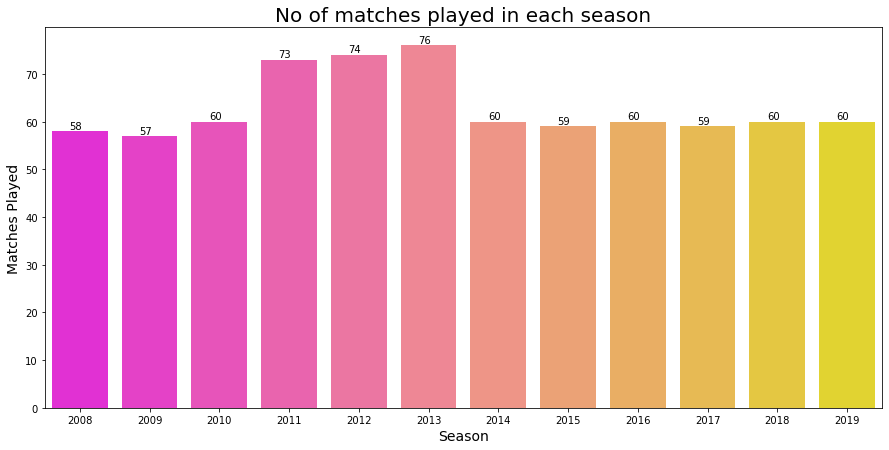

In [66]:
plt.figure(figsize = (15,7))
ax=sns.countplot(x=df_matches['season'], data=df_matches, palette='spring')
plt.title('No of matches played in each season', fontsize=20)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Matches Played', fontsize=14)
plt.xticks(rotation= 0)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.50))
plt.show()

### Venues for matches

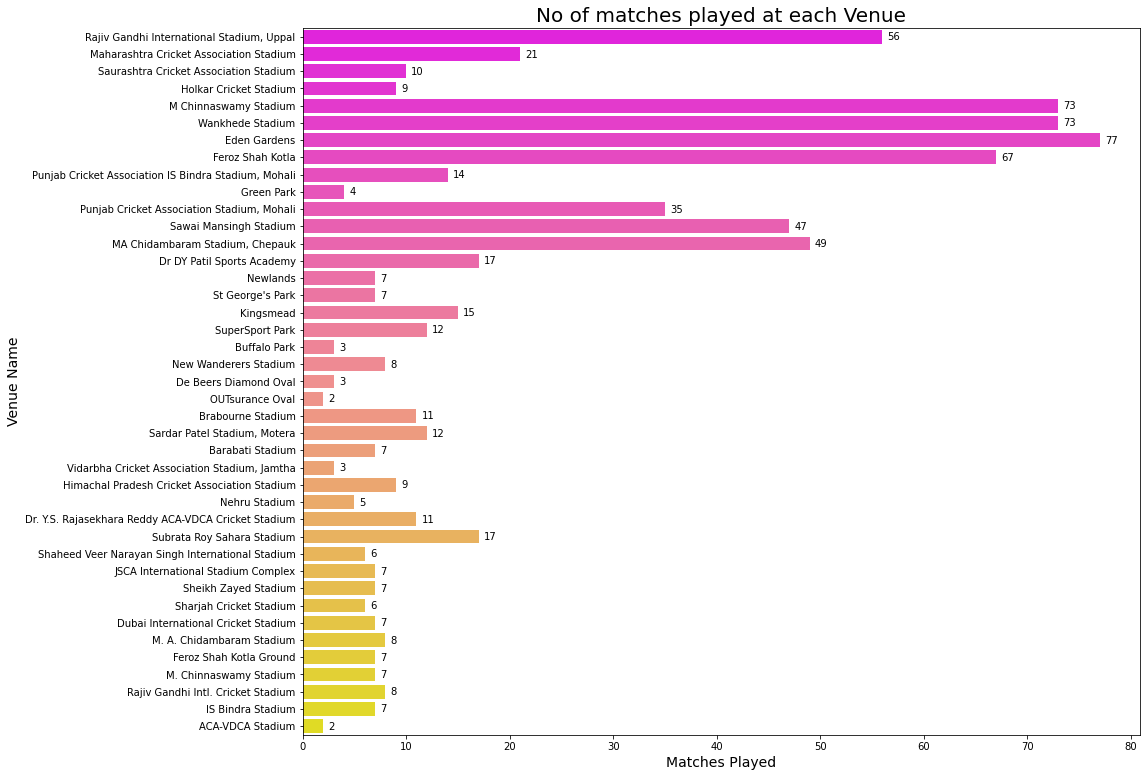

In [65]:
# Regions with most attacks
plt.figure(figsize = (15,13))
ax=sns.countplot(y='venue', data=df_matches, palette='spring')
plt.title('No of matches played at each Venue', fontsize=20)
plt.ylabel('Venue Name', fontsize=14)
plt.xlabel('Matches Played', fontsize=14)
for p in ax.patches:
    ax.annotate(format(p.get_width()), (p.get_width()+0.50,p.get_y()+0.60))
plt.show()

#### Eden Gardens has hosted maximum no of IPL matches

### No of season played in different cities

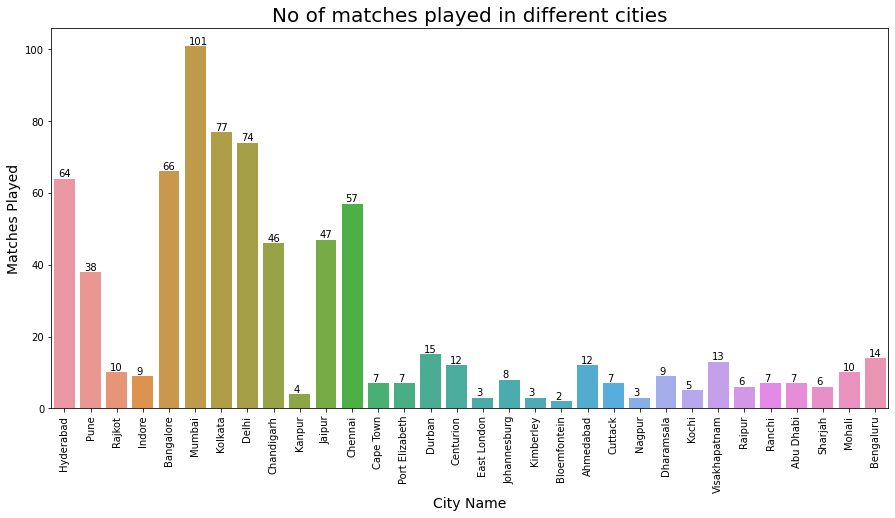

In [73]:
plt.figure(figsize = (15,7))
ax=sns.countplot(x=df_matches['city'], data=df_matches)
plt.title('No of matches played in different cities', fontsize=20)
plt.xlabel('City Name', fontsize=14)
plt.ylabel('Matches Played', fontsize=14)
plt.xticks(rotation= 90)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.50))
plt.show()

### Winners of each Season

In [78]:
season_winner = df_matches.drop_duplicates(subset=['season'], keep='last')[['season', 'winner']].reset_index(drop=True).sort_values('season')
season_winner

,season,winner
1,2008,RR
2,2009,SRH
3,2010,CSK
4,2011,CSK
5,2012,KKR
6,2013,MI
7,2014,KKR
8,2015,MI
9,2016,SRH
0,2017,MI


#### MI has won maximum IPL title which is 4 times followed by CSK which has won 3 times

### No of matches won by each team

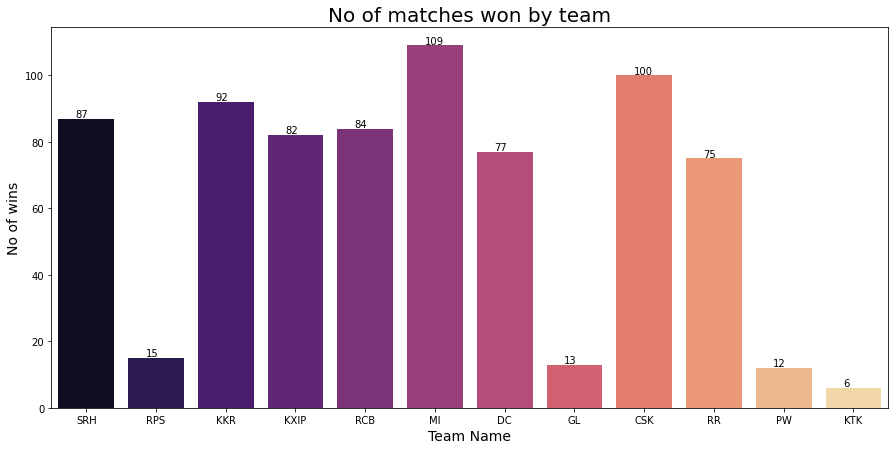

In [127]:
plt.figure(figsize = (15,7))
ax=sns.countplot(x=df_matches['winner'], data=df_matches, palette='magma')
plt.title('No of matches won by team', fontsize=20)
plt.xlabel('Team Name', fontsize=14)
plt.ylabel('No of wins', fontsize=14)
plt.xticks(rotation= 0)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.50))
plt.show()

#### MI has won maximum no of matches

### No of matches played by each team

In [114]:
# Total matches played by teams
total_matches = df_matches['team1'].value_counts() + df_matches['team2'].value_counts()
total_matches

CSK     164
DC      177
GL       30
KKR     178
KTK      14
KXIP    176
MI      187
PW       46
RCB     180
RPS      30
RR      147
SRH     183
dtype: int64

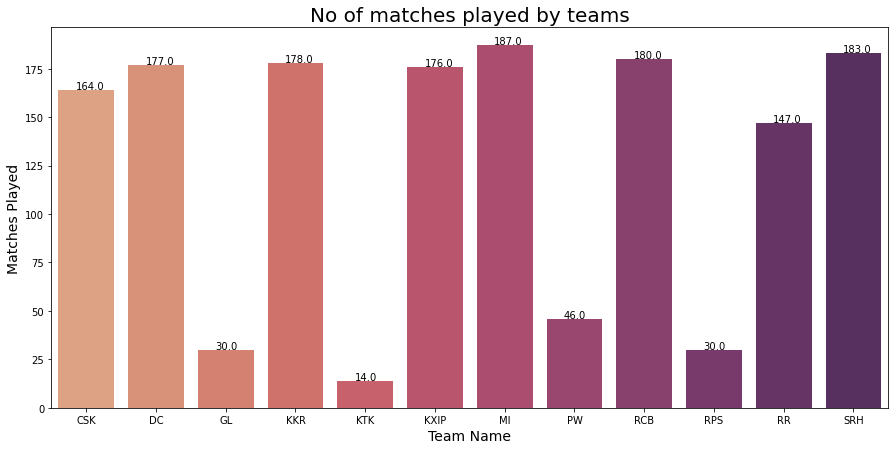

In [167]:
plt.figure(figsize = (15,7))
ax=sns.barplot(x=total_matches.index, y=total_matches.values, palette='flare')
plt.title('No of matches played by teams', fontsize=20)
plt.xlabel('Team Name', fontsize=14)
plt.ylabel('Matches Played', fontsize=14)
plt.xticks(rotation= 0)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.50))
plt.show()

In [238]:
# Total matches played
len(df_matches)

756

#### Till 2019, 756 matches were played in IPL so far

### Winning Percentage of each Team

In [ ]:
win_ratio = df_matches['winner'].value_counts() * 100 / total_matches
win_ratio.round(2).sort_values(ascending = False)

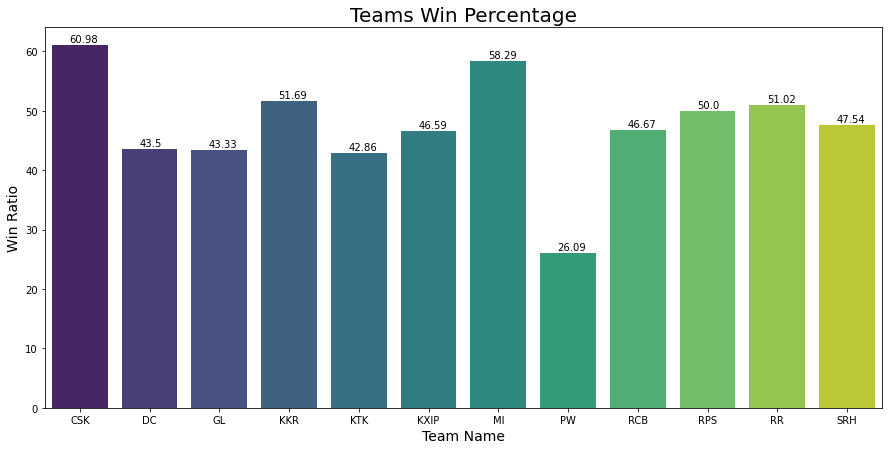

In [175]:
plt.figure(figsize = (15,7))
ax=sns.barplot(x=win_ratio.index, y=win_ratio.values.round(2), palette='viridis')
plt.title('Teams Win Percentage', fontsize=20)
plt.xlabel('Team Name', fontsize=14)
plt.ylabel('Win Ratio', fontsize=14)
plt.xticks(rotation= 0)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.50))
plt.show()

#### CSK has the best winning percentage of 60.98% 

### Match Result based on Bat first and Bowl First

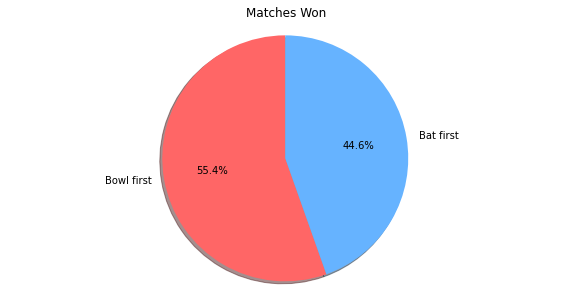

In [184]:
df_matches['win_by']=np.where(df_matches['win_by_runs']>0,'Bat first','Bowl first')

Win=df_matches.win_by.value_counts()
labels=np.array(Win.index)
sizes = Win.values
colors = ['#ff6666', '#66b3ff']
plt.figure(figsize = (10,5))
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%',shadow=True,startangle=90)
plt.title('Matches Won')
plt.axis('equal')
plt.show()

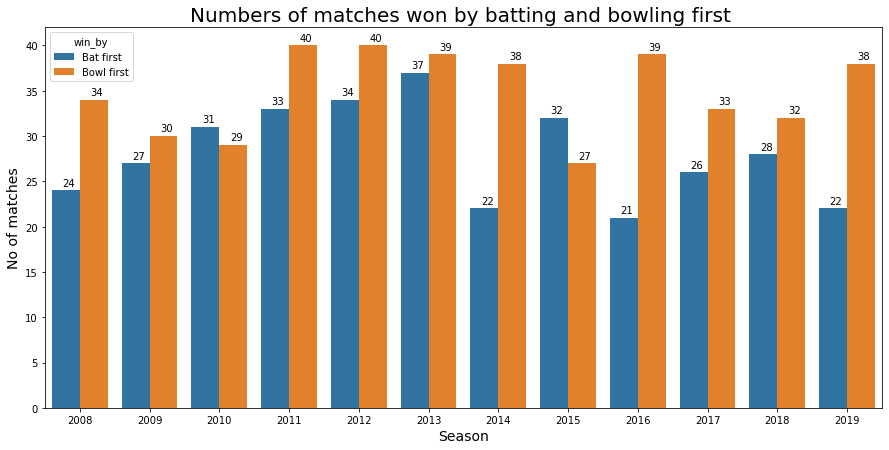

In [191]:
plt.figure(figsize = (15,7))
ax=sns.countplot(x='season',hue='win_by',data=df_matches)
plt.title("Numbers of matches won by batting and bowling first ",fontsize=20)
plt.xlabel("Season",fontsize=14)
plt.ylabel("No of matches",fontsize=14)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.50))
plt.show()

#### Except in 2010 and 2015 season, teams bowling first have won more matches compared to team batting first 

### Toss decision

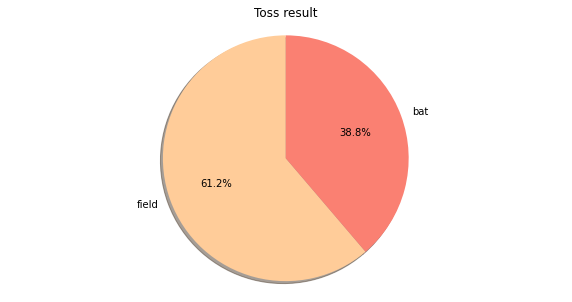

In [196]:
Toss=df_matches.toss_decision.value_counts()
labels=np.array(Toss.index)
sizes = Toss.values
colors = ['#ffcc99', '#fa8072']
plt.figure(figsize = (10,5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Toss result')
plt.axis('equal')
plt.show()

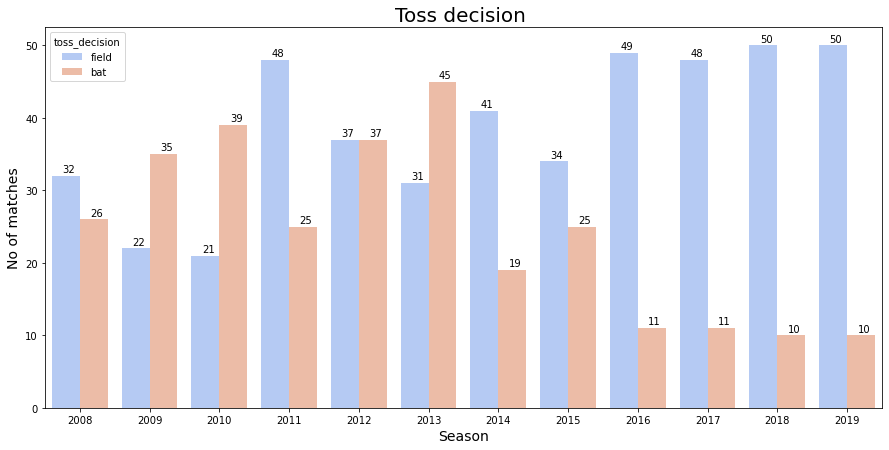

In [203]:
# Toss decision
plt.figure(figsize = (15,7))
ax=sns.countplot(x='season',hue='toss_decision',data=df_matches,palette='coolwarm')
plt.title("Toss decision ",fontsize=20)
plt.xlabel("Season",fontsize=14)
plt.ylabel("No of matches",fontsize=14)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.50))
plt.show()

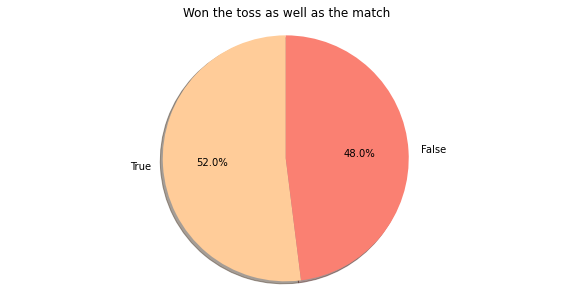

In [209]:
# Teams who won the toss and the match as well
wins = df_matches['toss_winner'] == df_matches['winner']
res= wins.value_counts()
labels=np.array(res.index)
sizes = res.values
colors = ['#ffcc99', '#fa8072']
plt.figure(figsize = (10,5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Won the toss as well as the match')
plt.axis('equal')
plt.show()

In [227]:
# The team that won the most number of toss

toss_win = df_matches['toss_winner'].value_counts()

toss_df = pd.DataFrame(columns=["team", "wins"])

for items in toss_win.iteritems():
    temp_df = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    toss_df = toss_df.append(temp_df, ignore_index=True)

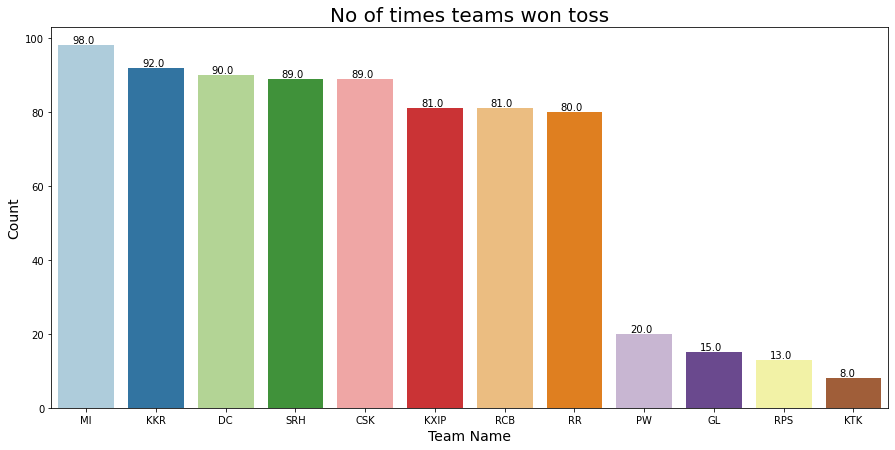

In [232]:
plt.figure(figsize = (15,7))
ax=sns.barplot(x='team', y='wins', data=toss_df, palette='Paired')
plt.title("No of times teams won toss", fontsize=20)
plt.xlabel("Team Name",fontsize=14)
plt.ylabel("Count",fontsize=14)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.20, p.get_height()+0.50))
plt.show()

#### MI have won the toss maximum times i.e 98

In [220]:
# Season wise winner
final_matches=df_matches.drop_duplicates(subset=['season'], keep='last')
final_matches[['season','winner']].reset_index(drop=True).sort_values('season')

,season,winner
1,2008,RR
2,2009,SRH
3,2010,CSK
4,2011,CSK
5,2012,KKR
6,2013,MI
7,2014,KKR
8,2015,MI
9,2016,SRH
0,2017,MI


In [222]:
#  IPL Finals venues and winners along with the number of wins
final_matches.groupby(['city','winner']).size()

city          winner
Bangalore     KKR       1
              SRH       1
Chennai       CSK       1
              KKR       1
Hyderabad     MI        2
Johannesburg  SRH       1
Kolkata       MI        2
Mumbai        CSK       2
              RR        1
dtype: int64

In [223]:
# Toss winner, Toss decision, Winner in final matches.
final_matches[['toss_winner','toss_decision','winner']].reset_index(drop=True)

,toss_winner,toss_decision,winner
0,MI,bat,MI
1,RR,field,RR
2,RCB,field,SRH
3,CSK,bat,CSK
4,CSK,bat,CSK
5,CSK,bat,KKR
6,MI,bat,MI
7,KKR,field,KKR
8,CSK,field,MI
9,SRH,bat,SRH


In [224]:
# Player of the match for finals
final_matches[['winner','player_of_match']].reset_index(drop=True)

,winner,player_of_match
0,MI,KH Pandya
1,RR,YK Pathan
2,SRH,A Kumble
3,CSK,SK Raina
4,CSK,M Vijay
5,KKR,MS Bisla
6,MI,KA Pollard
7,KKR,MK Pandey
8,MI,RG Sharma
9,SRH,BCJ Cutting


In [261]:
print("Match detail where team won by highest runs:\n", df_matches.iloc[df_matches['win_by_runs'].idxmax()])

Match detail where team won by highest runs:
 id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                            MI
team2                            DC
toss_winner                      DC
toss_decision                 field
result                       normal
dl_applied                        0
winner                           MI
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
win_by                    Bat first
Name: 43, dtype: object


#### Biggest victory by runs in IPL History is winning by 146 runs

In [263]:
print("Match where team won by highest wickets:\n",df_matches.iloc[df_matches['win_by_wickets'].idxmax()])

Match where team won by highest wickets:
 id                                                      3
season                                               2017
city                                               Rajkot
date                                           2017-04-07
team1                                                  GL
team2                                                 KKR
toss_winner                                           KKR
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                                                KKR
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                       

#### Biggest victory by wickets in IPL history is winning by 10 wickets

### Top 10 Players who got most Player of the Match Award 

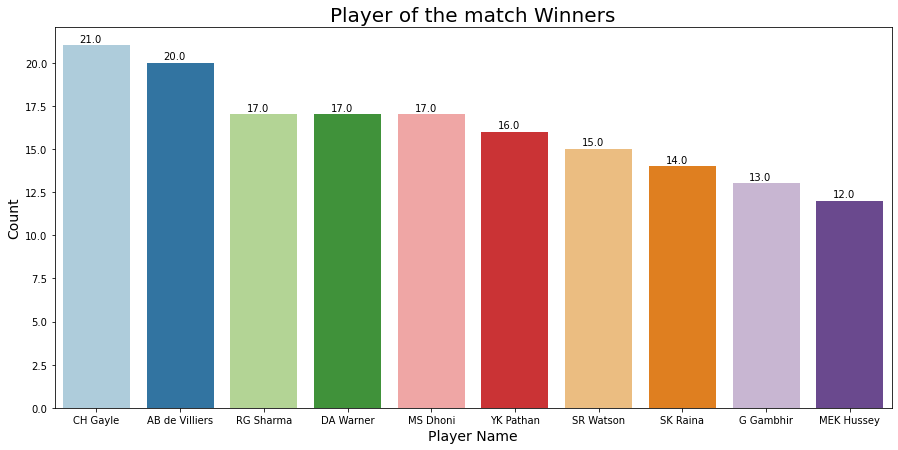

In [233]:
plt.figure(figsize = (15,7))
top_players = df_matches.player_of_match.value_counts()[:10]
ax=sns.barplot(x = top_players.index, y = top_players, orient='v', palette="Paired");
plt.ylabel('Count', fontsize=14)
plt.xlabel('Player Name', fontsize=14)
plt.title('Player of the match Winners', fontsize=20)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.20, p.get_height()+0.20))
plt.show()

#### Chris Gayle has won the most Player of Match award i.e 21 times

### Number of fours hit by team

In [265]:
four_data=df_deliveries[df_deliveries['batsman_runs']==4]
four_data.groupby('batting_team')['batsman_runs'].agg([('no of four','count'), ('runs by four','sum')]).sort_values('no of four',ascending=0)

,no of four,runs by four
batting_team,,
MI,2588,10352
KXIP,2458,9832
KKR,2434,9736
SRH,2401,9604
DC,2400,9600
RCB,2360,9440
CSK,2193,8772
RR,2035,8140
PW,525,2100


#### MI has hitted most no of four i.e 2588

### No of sixes hit by team

In [266]:
four_data=df_deliveries[df_deliveries['batsman_runs']==6]
four_data.groupby('batting_team')['batsman_runs'].agg([('no of six','count'), ('runs by six','sum')]).sort_values('no of six',ascending=0)

,no of six,runs by six
batting_team,,
RCB,1132,6792
MI,1096,6576
KXIP,976,5856
CSK,973,5838
SRH,933,5598
KKR,930,5580
DC,888,5328
RR,681,4086
PW,196,1176


#### RCB has hitted most no of sixes i.e 1132

### Players with most fours

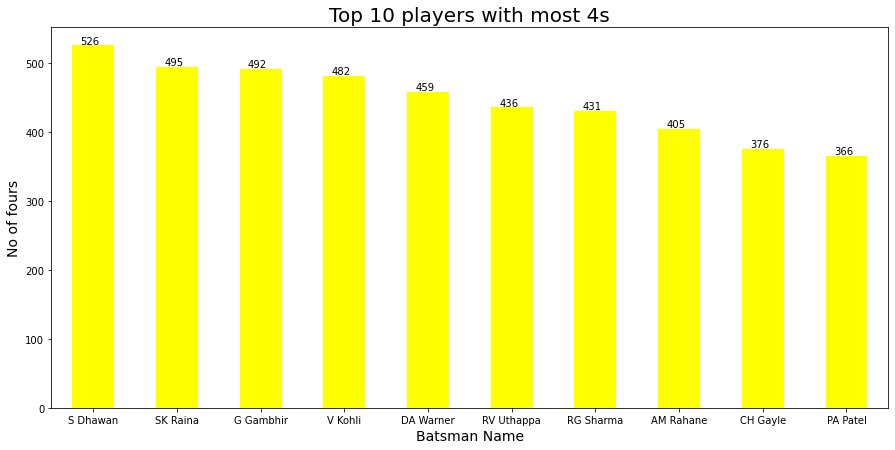

In [296]:
ax=df_deliveries[df_deliveries["batsman_runs"] == 4].groupby("batsman")["batsman_runs"].count().sort_values(ascending = False).head(10).plot(kind="bar", figsize=(15,7), color="yellow")
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+2))
plt.xticks(rotation=0)
plt.ylabel('No of fours', fontsize=14)
plt.xlabel('Batsman Name', fontsize=14)
plt.title('Top 10 players with most 4s', fontsize=20)
plt.show()

#### Sikhar Dhawan has hitted most fours followed by Suresh Raina and Gautam Gambhir

### Players with most sixes

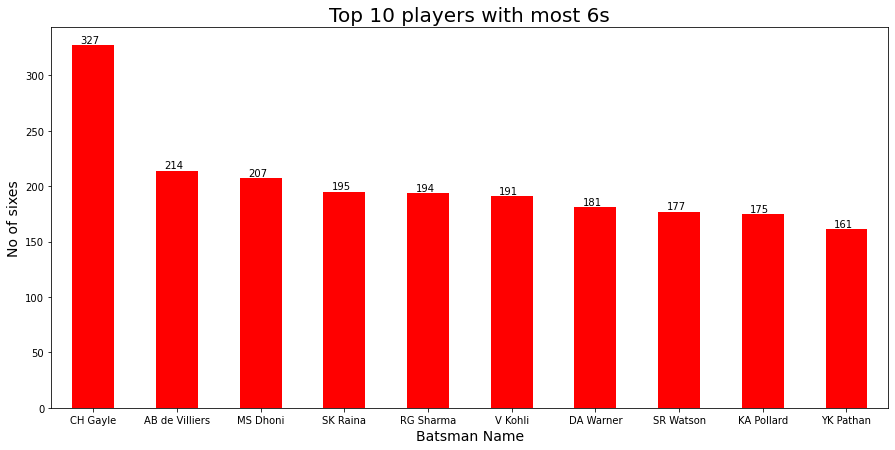

In [297]:
ax=df_deliveries[df_deliveries["batsman_runs"] == 6].groupby("batsman")["batsman_runs"].count().sort_values(ascending = False).head(10).plot(kind="bar", figsize=(15,7), color="red")
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+2))
plt.xticks(rotation=0)
plt.ylabel('No of sixes', fontsize=14)
plt.xlabel('Batsman Name', fontsize=14)
plt.title('Top 10 players with most 6s', fontsize=20)
plt.show()

#### Chris Gayle has hitted maximum sixes followed by AB de Villiers and MS Dhoni

### Top Run Scorer in IPL History

In [283]:
batsman_runs=df_deliveries.groupby("batsman")["batsman_runs"].count().sort_values(ascending = False)
top_scorer=batsman_runs.where(batsman_runs >= 3000).dropna()
top_scorer

batsman
V Kohli       4211.0
SK Raina      4044.0
RG Sharma     3816.0
S Dhawan      3776.0
G Gambhir     3524.0
RV Uthappa    3492.0
DA Warner     3398.0
MS Dhoni      3318.0
AM Rahane     3215.0
CH Gayle      3131.0
Name: batsman_runs, dtype: float64

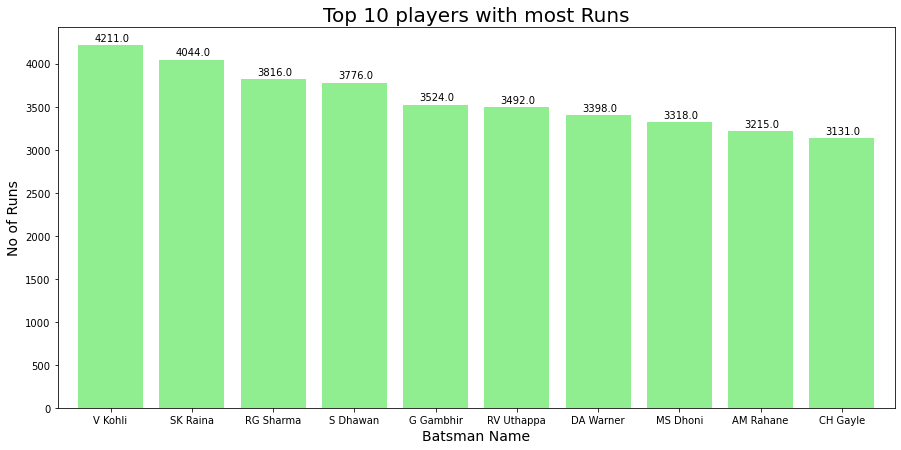

In [306]:
plt.subplots(figsize=(15,7))
ax=top_scorer.plot.bar(width=0.8,color='lightgreen')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.20, p.get_height()+50))
plt.xticks(rotation=0)
plt.ylabel('No of Runs', fontsize=14)
plt.xlabel('Batsman Name', fontsize=14)
plt.title('Top 10 players with most Runs', fontsize=20)
plt.show()

#### Virat Kohli has scored most no of runs in IPL history followed by Suresh Raina and Rohit Sharma

### Dismissals in IPL

In [316]:
df_deliveries['dismissal_kind'].value_counts()

caught                   5348
bowled                   1581
run out                   852
lbw                       540
stumped                   278
caught and bowled         211
retired hurt               12
hit wicket                 10
obstructing the field       2
Name: dismissal_kind, dtype: int64

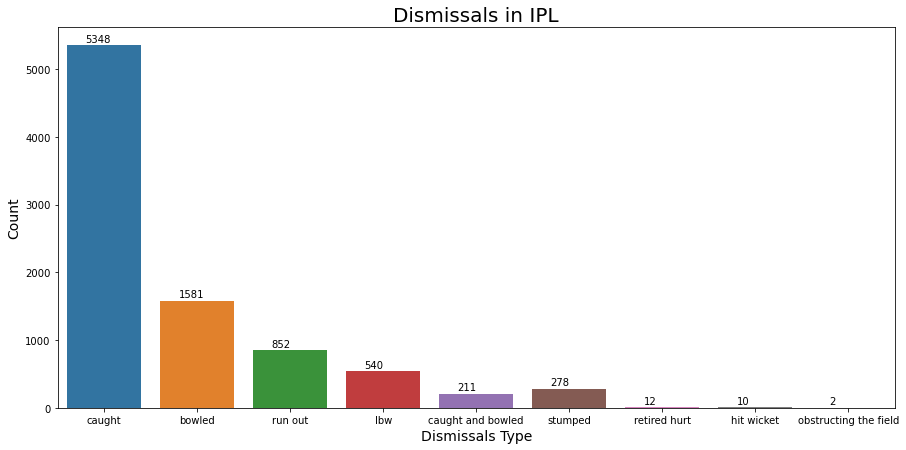

In [335]:
# Dismissals in IPL
plt.figure(figsize=(15,7))
ax=sns.countplot(x=df_deliveries.dismissal_kind)
plt.title("Dismissals in IPL",fontsize=20)
plt.xlabel("Dismissals Type",fontsize=14)
plt.ylabel("Count",fontsize=14)
plt.xticks(rotation=0)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.20, p.get_height()+50))
plt.show()

### Top 10 Wicket Takers in IPL History

In [311]:
# Excluding run out, retired hurt and obstructing the field for bowlers wicket data
wicket_data=df_deliveries.dropna(subset=['dismissal_kind'])
wicket_data=wicket_data[~wicket_data['dismissal_kind'].isin(['run out','retired hurt','obstructing the field'])].groupby("bowler")['bowler'].count().sort_values(ascending = False)

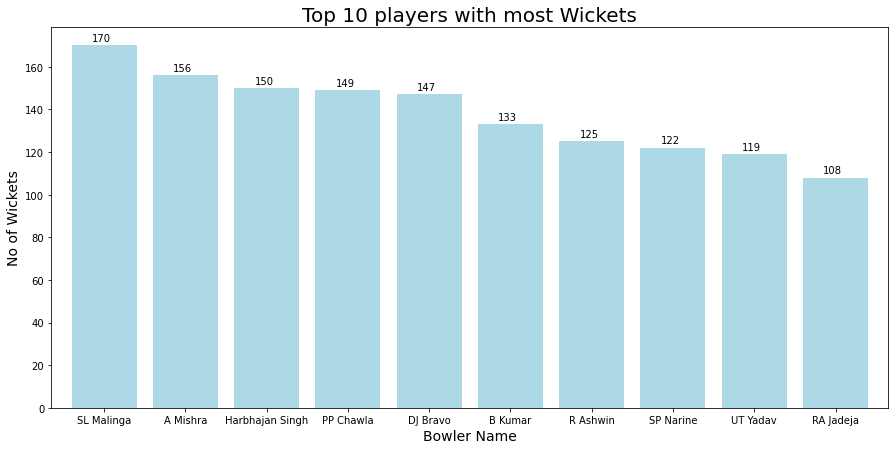

In [326]:
plt.figure(figsize=(15,7))
ax = wicket_data.head(10).plot.bar(width=0.8,color=('lightblue'))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.25, p.get_height()+2))
plt.ylabel('No of Wickets', fontsize=14)
plt.xlabel('Bowler Name', fontsize=14)
plt.title('Top 10 players with most Wickets', fontsize=20)
plt.xticks(rotation=0)
plt.show()

#### Lasith Malinga has most no of wickets in IPL History followed by Amit Mishra and Harbhajan Singh

### Most Matches as an Umpire

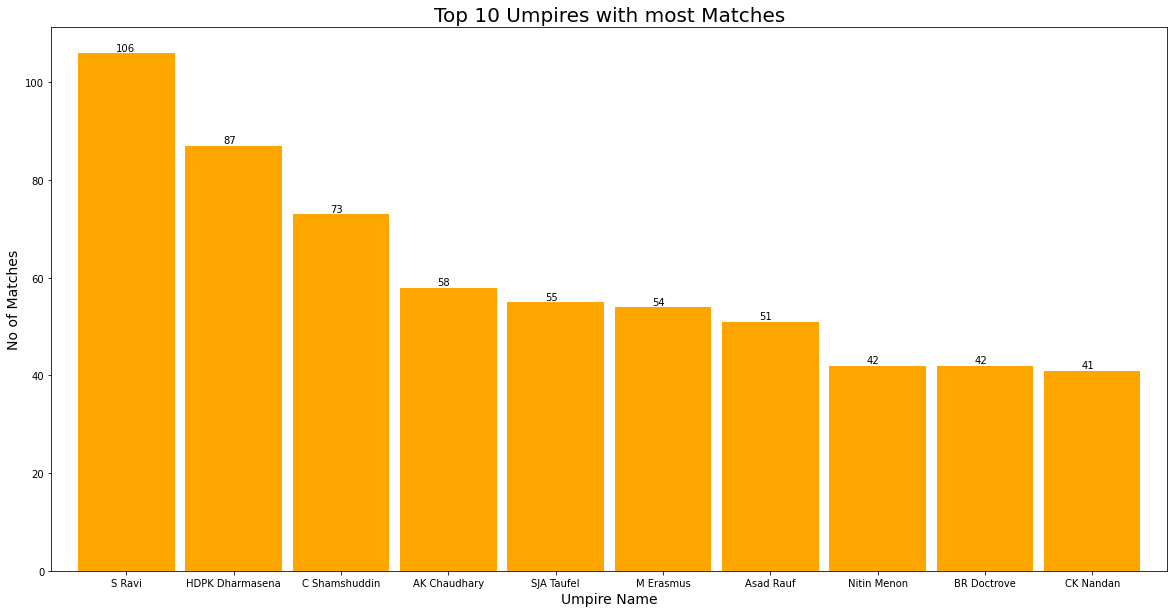

In [344]:
plt.figure(figsize=(20,10))
umpires=pd.concat([df_matches['umpire1'],df_matches['umpire2']]) 
ax14=umpires.value_counts().head(10).plot.bar(width=0.9,color='orange')
for p in ax14.patches:
    ax14.annotate(format(p.get_height()), (p.get_x()+0.35, p.get_height()+0.50))
plt.ylabel('No of Matches', fontsize=14)
plt.xlabel('Umpire Name', fontsize=14)
plt.title('Top 10 Umpires with most Matches', fontsize=20)
plt.xticks(rotation=0)
plt.show()

#### S Ravi has featured in maximum no of matches among all umpires

# Conclusion

#### 1. Mumbai Indians is the most successful team in IPL History. They have won 4 seasons and 109 matches, maximum by any team.

#### 2. Chennai Super Kings has the best winning percentage by any team followed by Mumbai Indians. They are second most successful team in IPL History. They have won 3 seasons.

#### 3. Toss is an important factor in winning matches.

#### 4. Mumbai Indians has won the most number of toss.

#### 5. After winning toss most teams decides to do fielding first.

#### 6. Teams which Bowl first has higher chances of winning then the team which bat first.

#### 7. Chris Gayle has won the maximum number of player of the match title.

#### 8. Top leading run scorer in IPL is Virat Kohli followed by Suresh Raina and Rohit Sharma.

#### 9. Sikhar Dhawan has hitted most fours followed by Suresh Raina and Gautam Gambhir.

#### 10. Chris Gayle has hitted maximum sixes followed by AB de Villiers and MS Dhoni.

#### 11. Most common mode of dismissal of batsman is getting caught

#### 12. Eden Gardens has hosted most no of IPL matches.

#### 13. Mumbai city has hosted the most number of IPL matches.

#### 14. S Ravi has featured in maximum no of matches as an umpire among all umpires.

### Teams a company should endorse for its products are Mumbai Indians, Chennai Super Kings and Kolkata Knight Riders.

### Players a company should endorse for its products are Virat Kohli, Suresh Raina, Chris Gayle, Lasith Malinga, MS Dhoni, Rohit Sharma, Shikhar Dhawan.